In [1]:
# Bibliotecas padrão
import sys

# PyData stack
import pandas as pd            # Para manipulação de dados
import numpy as np             # Para operações numéricas
import matplotlib.pyplot as plt       # Para visualização de dados
import seaborn as sns          # Para visualização de dados estatísticos
import sklearn                 # Para aprendizado de máquina
from sklearn import svm       # Para suporte de máquinas de vetores de suporte (SVM)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [2]:
print(f'Versão do Python: {sys.version}')
print(f'Versão do Pandas: {pd.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do scikit-learn: {sklearn.__version__}')

Versão do Python: 3.11.7 (main, Dec 15 2023, 18:12:31) [GCC 11.2.0]
Versão do Pandas: 2.1.4
Versão do seaborn: 0.12.2
Versão do scikit-learn: 1.2.2


# Carregar os dados

In [3]:
iris = pd.read_csv('data/iris.csv')

### Dados carregados

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris['species'] = iris['species'].astype('category')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [11]:
# Estatísticas básicas dos dados
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
values = ['count', 'min', 'max', 'mean', 'std']
iris.groupby(by='species', observed=True).agg(values)

sepal_length                            sepal_width            \
                  count  min  max   mean       std       count  min  max   
species                                                                    
setosa               50  4.3  5.8  5.006  0.352490          50  2.3  4.4   
versicolor           50  4.9  7.0  5.936  0.516171          50  2.0  3.4   
virginica            50  4.9  7.9  6.588  0.635880          50  2.2  3.8   

                            petal_length                             \
             mean       std        count  min  max   mean       std   
species                                                               
setosa      3.418  0.381024           50  1.0  1.9  1.464  0.173511   
versicolor  2.770  0.313798           50  3.0  5.1  4.260  0.469911   
virginica   2.974  0.322497           50  4.5  6.9  5.552  0.551895   

           petal_width                             
                 count  min  max   mean       std  
species                                            
setosa              50  0.1  0.6  0.244  0.107210  
versicolor          50  1.0  1.8  1.326  0.197753  
virginica           50  1.4  2.5  2.026  0.274650

### Plot dos dados

<Axes: ylabel='Frequency'>

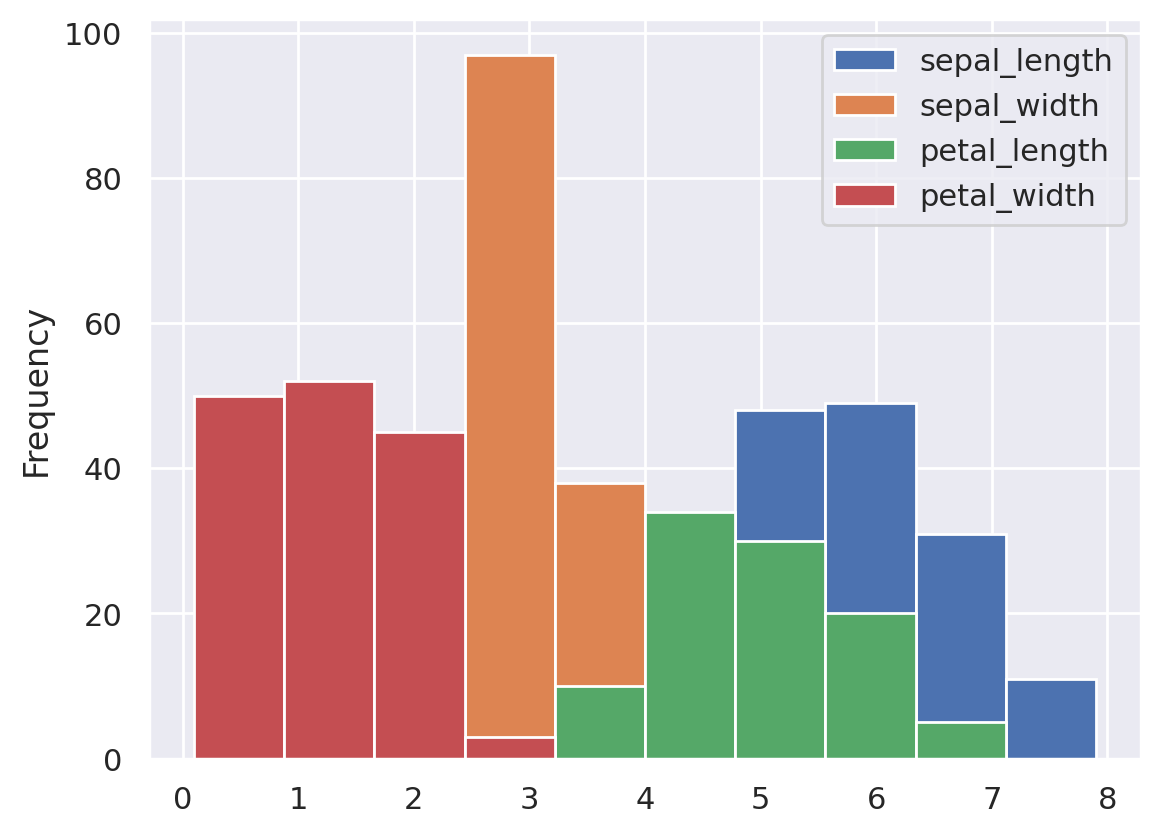

In [76]:
iris.plot.hist()

In [22]:
iris.set_index('species', inplace=True)

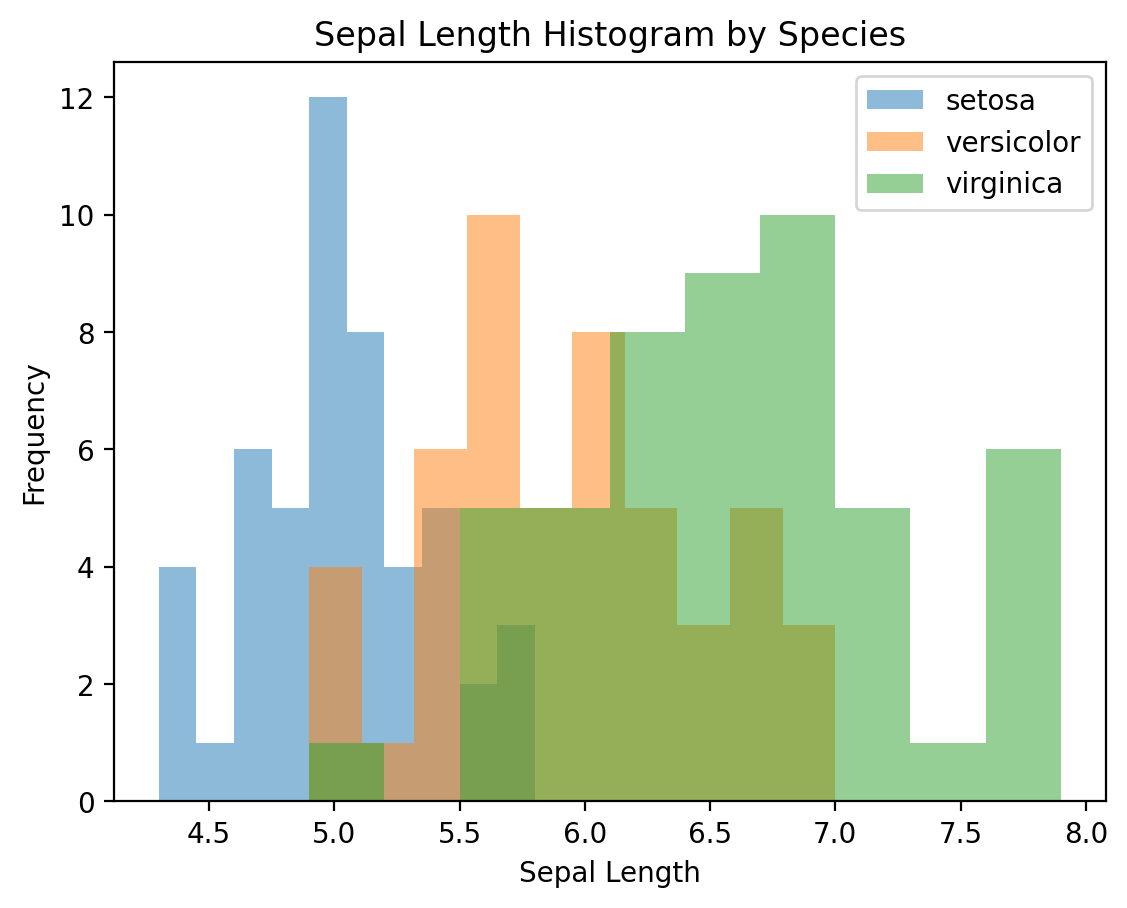

In [25]:
iris.groupby('species', observed=True)['sepal_length'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Sepal Length Histogram by Species')
plt.show()

<Axes: ylabel='Frequency'>

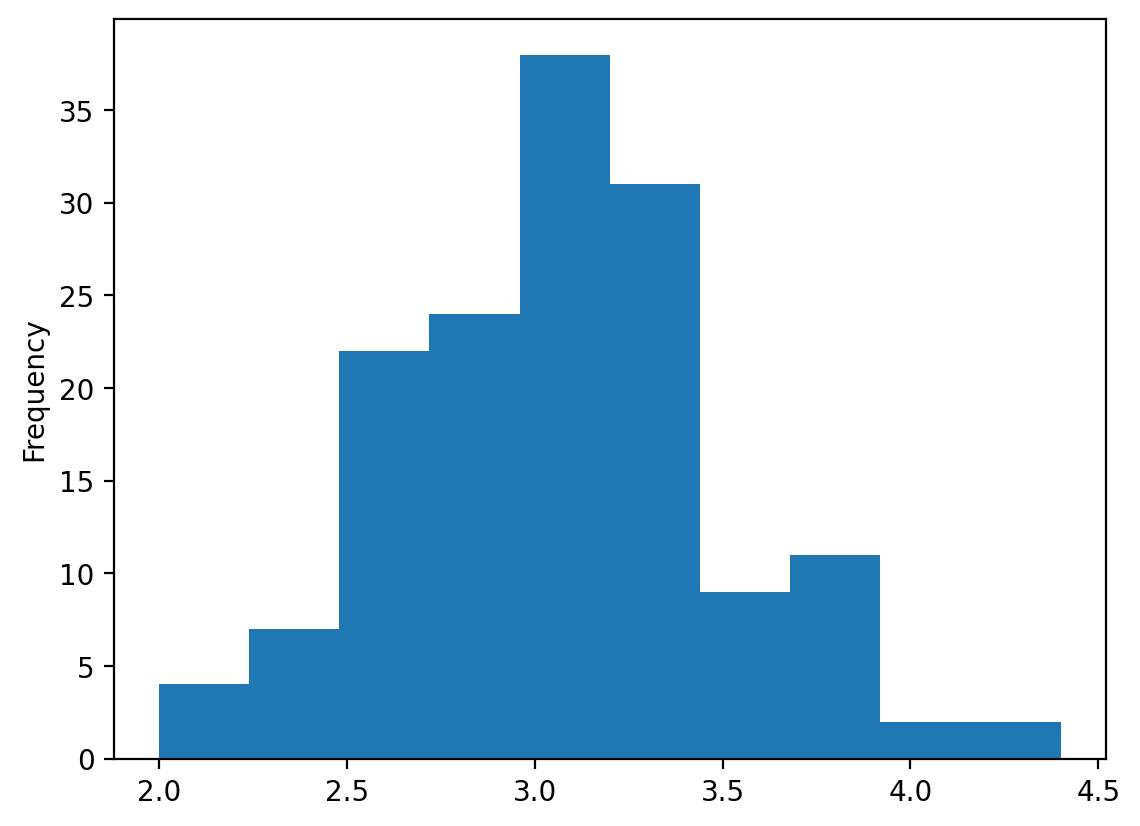

In [20]:
iris['sepal_width'].plot.hist()

<Axes: ylabel='Frequency'>

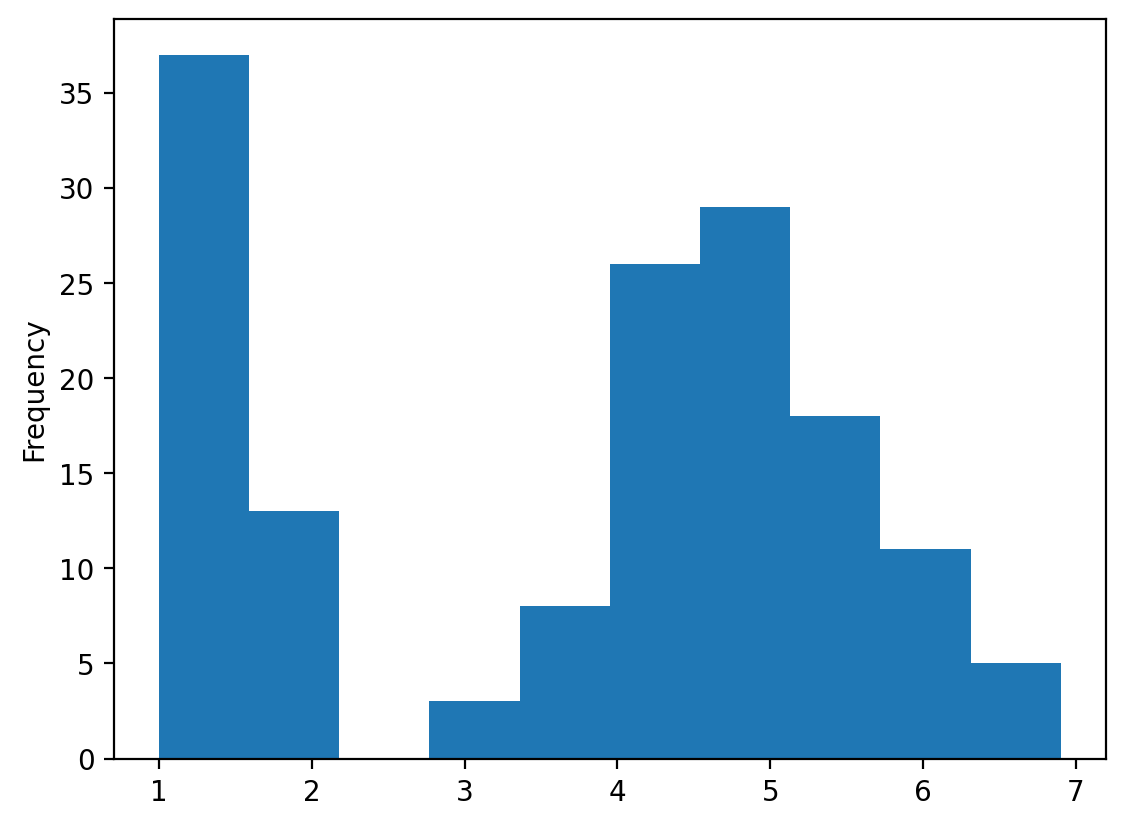

In [26]:
iris['petal_length'].plot.hist()

<Axes: ylabel='Frequency'>

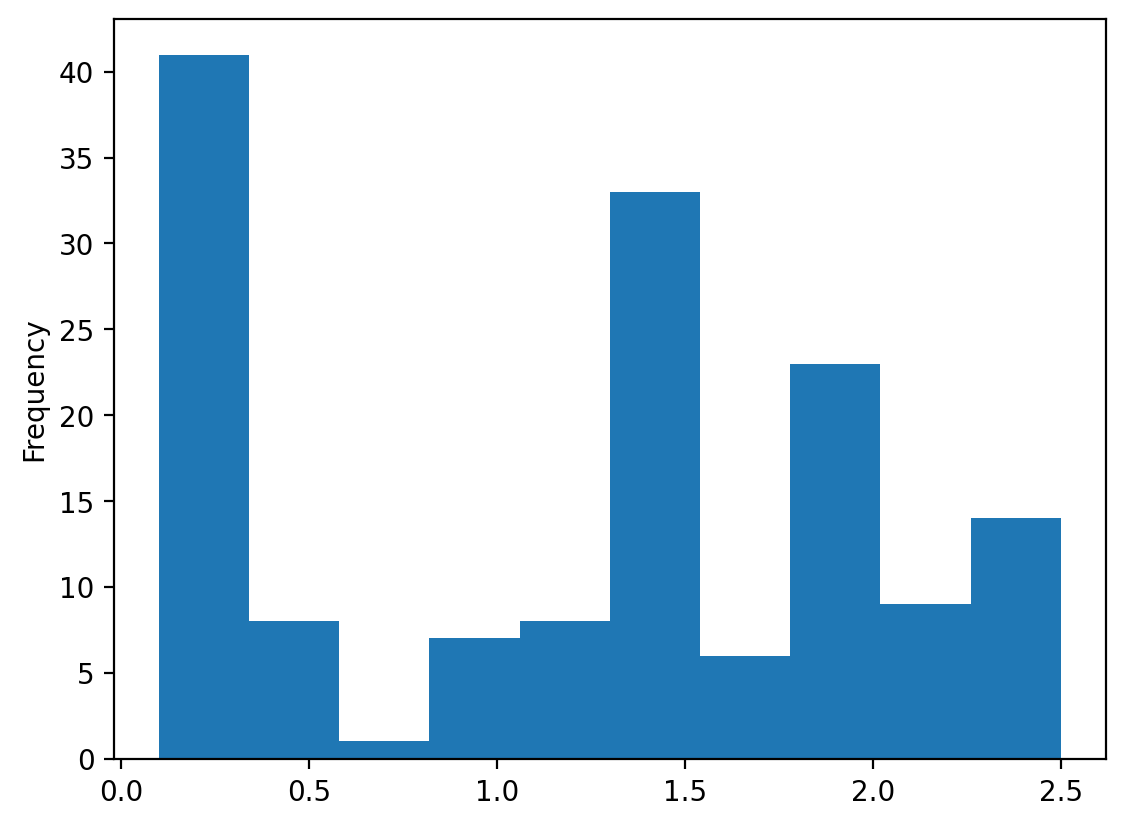

In [27]:
iris['petal_width'].plot.hist()

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

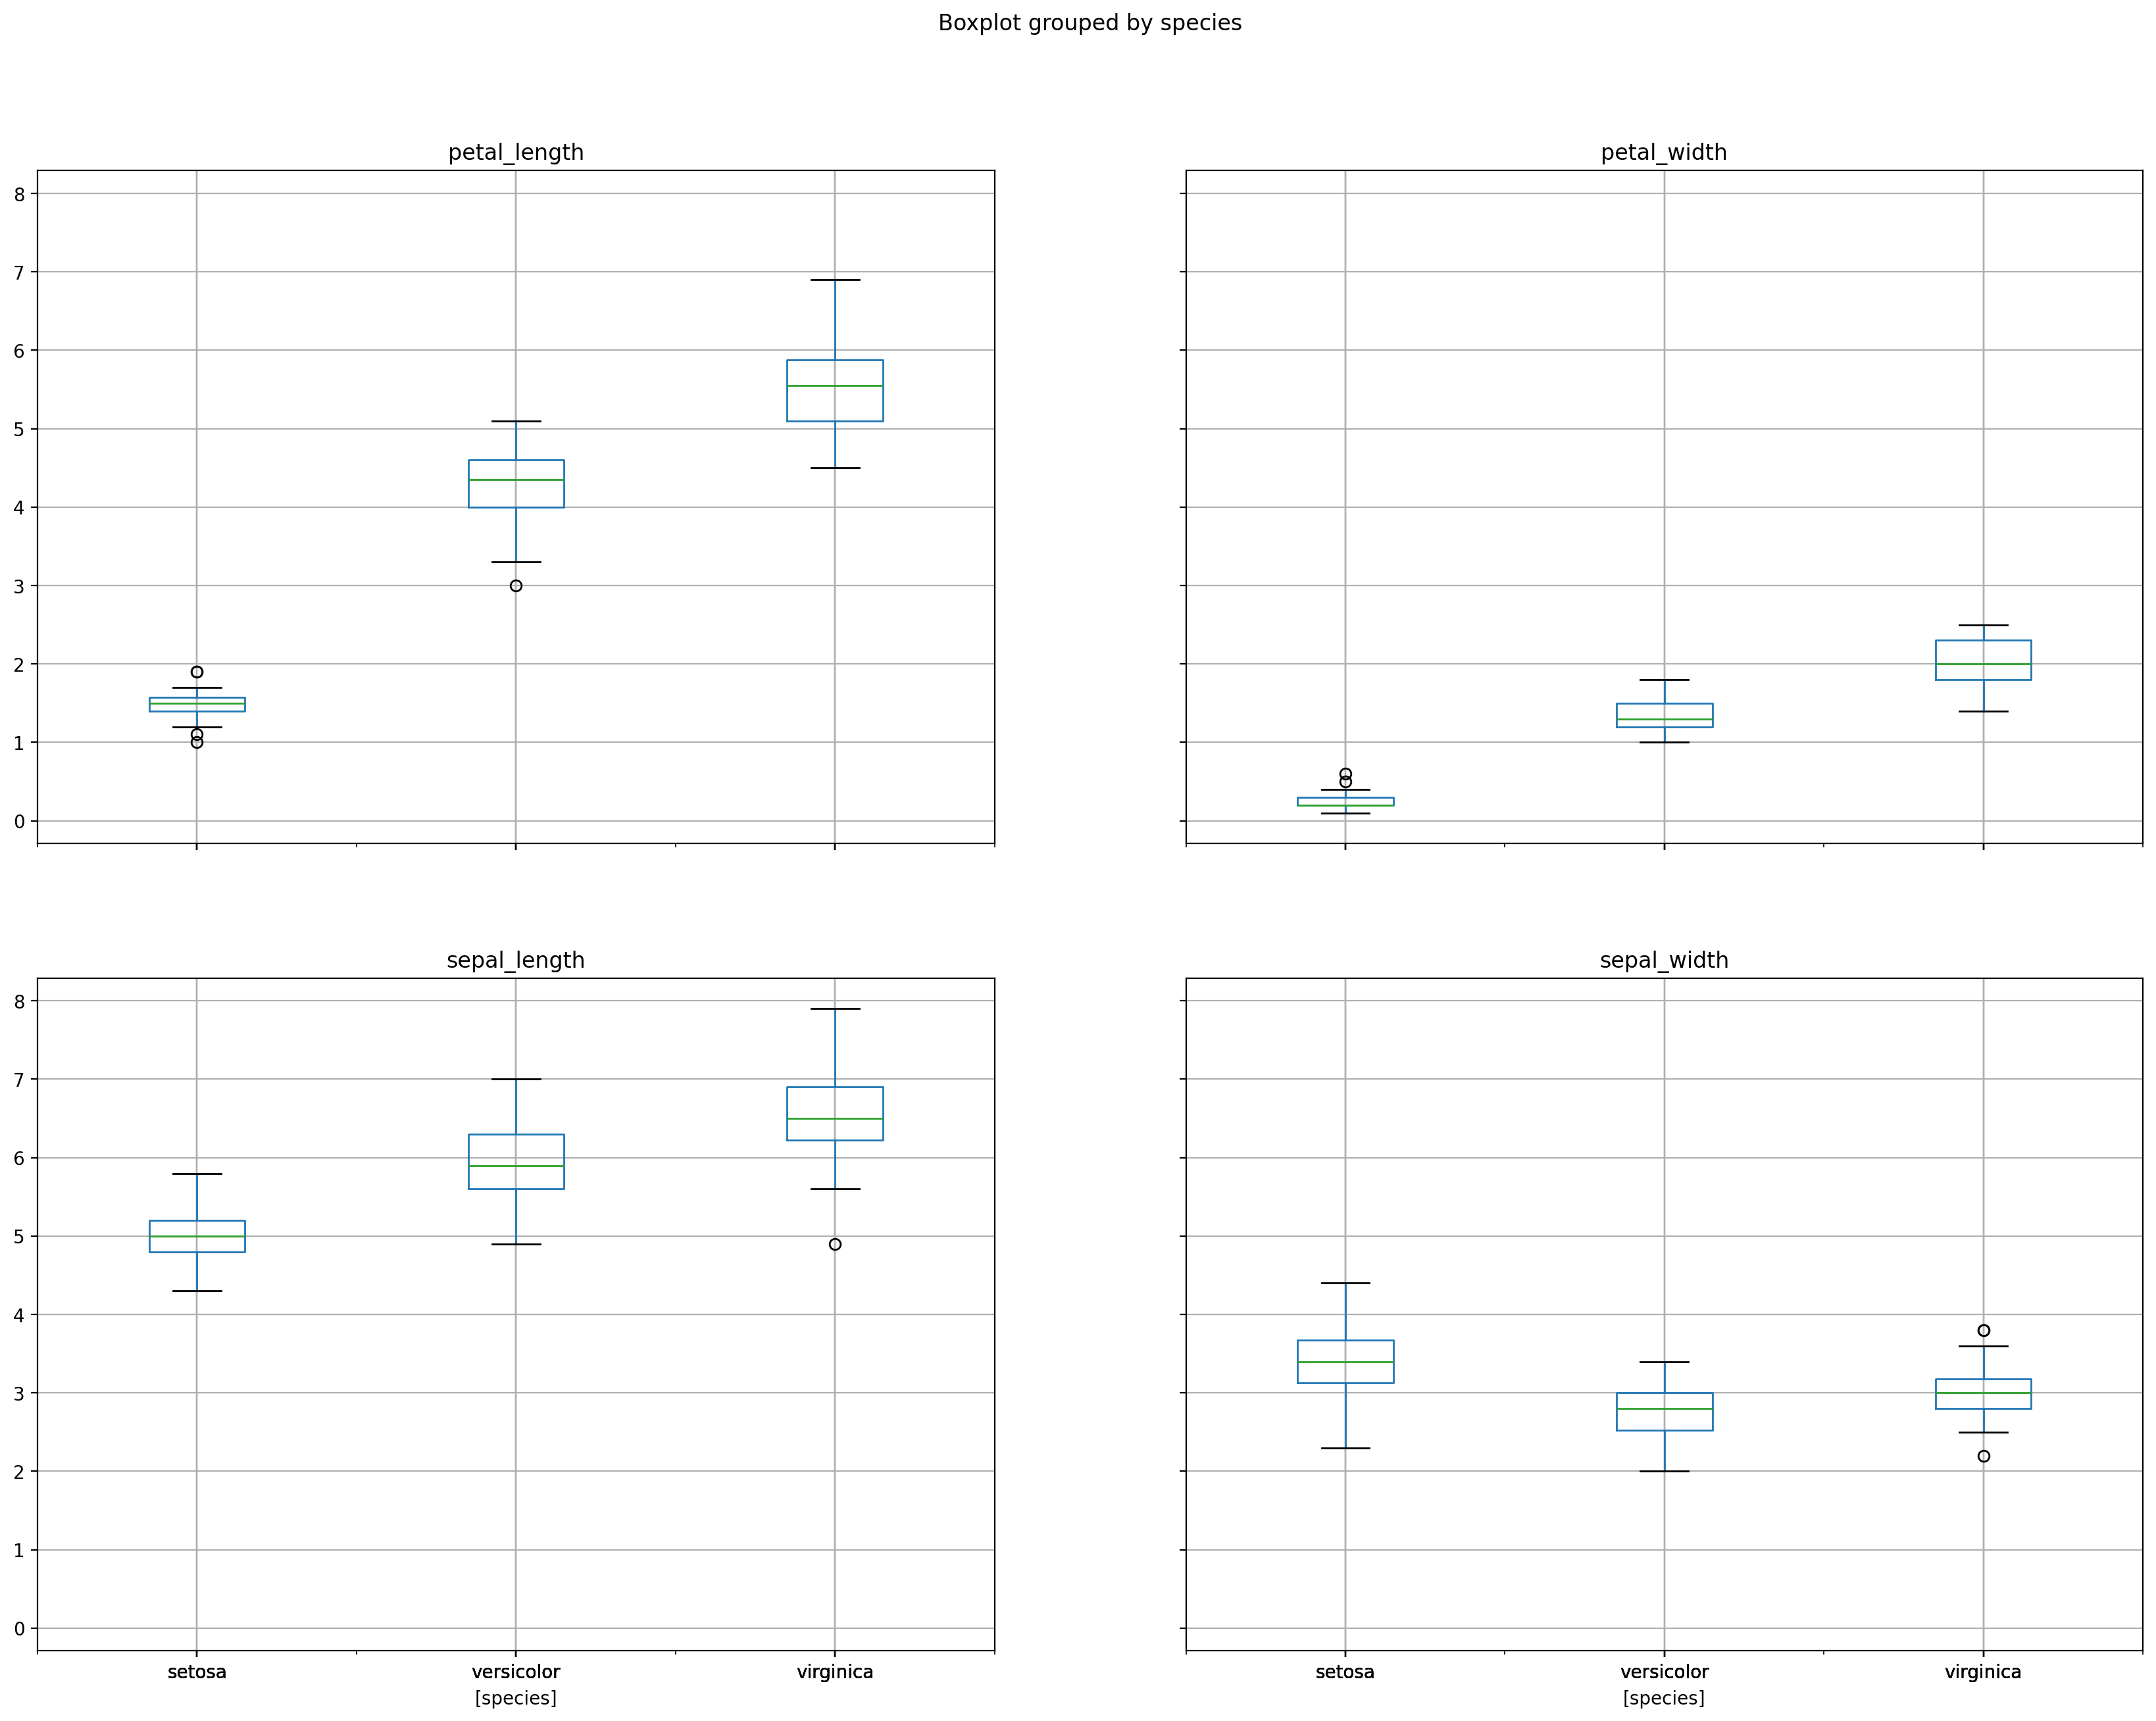

In [28]:
iris.boxplot(by='species', figsize=(20, 15))

In [30]:
from pandas.plotting import andrews_curves

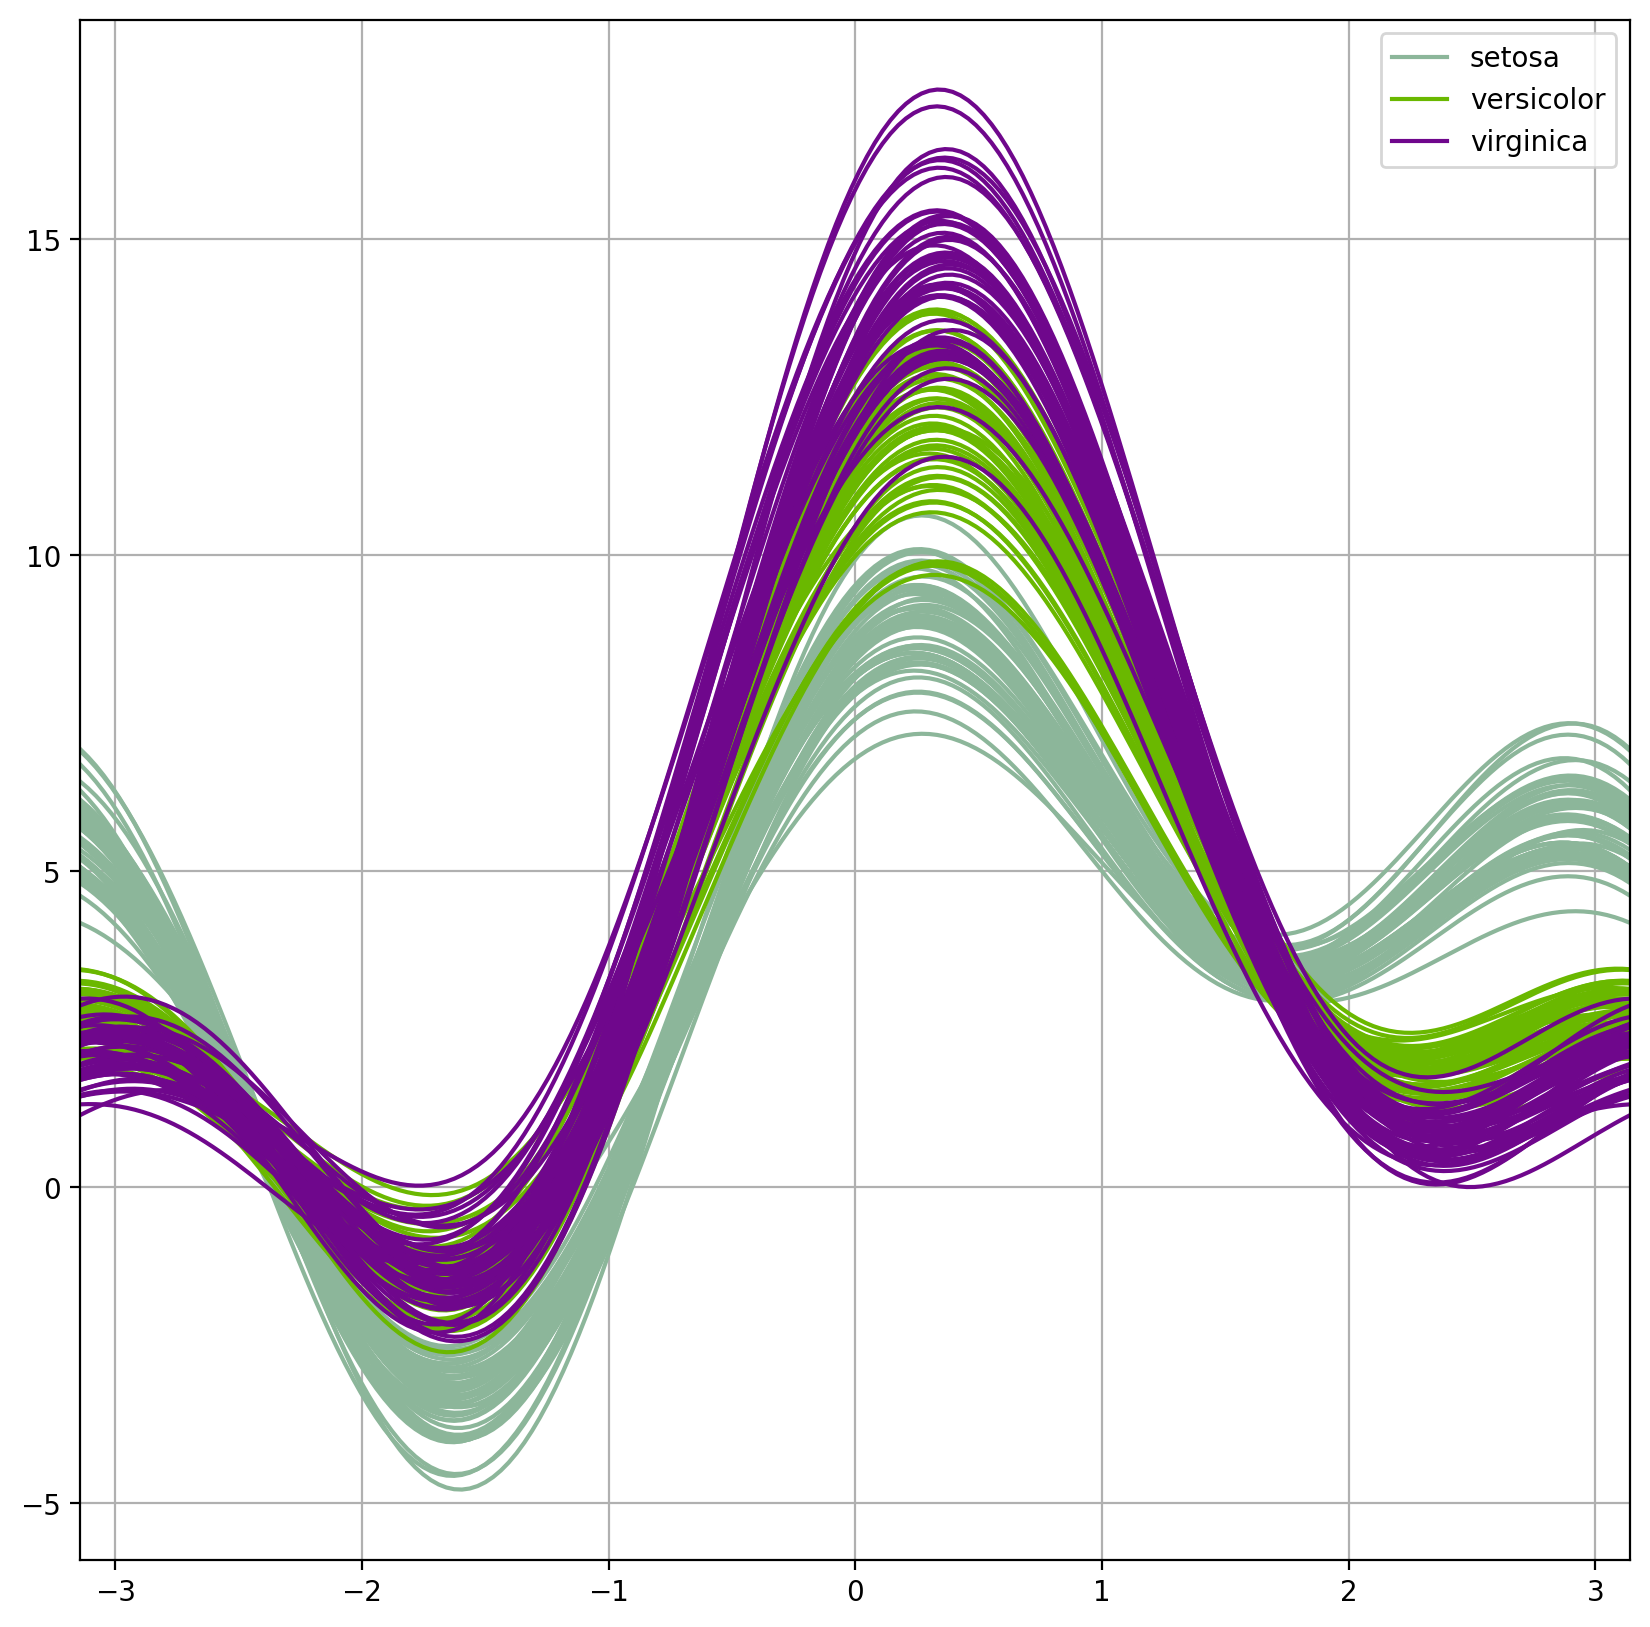

In [33]:
plt.figure(figsize=(10, 10))
andrews_curves(iris.reset_index(), 'species')
plt.show()

In [34]:
from pandas.plotting import parallel_coordinates

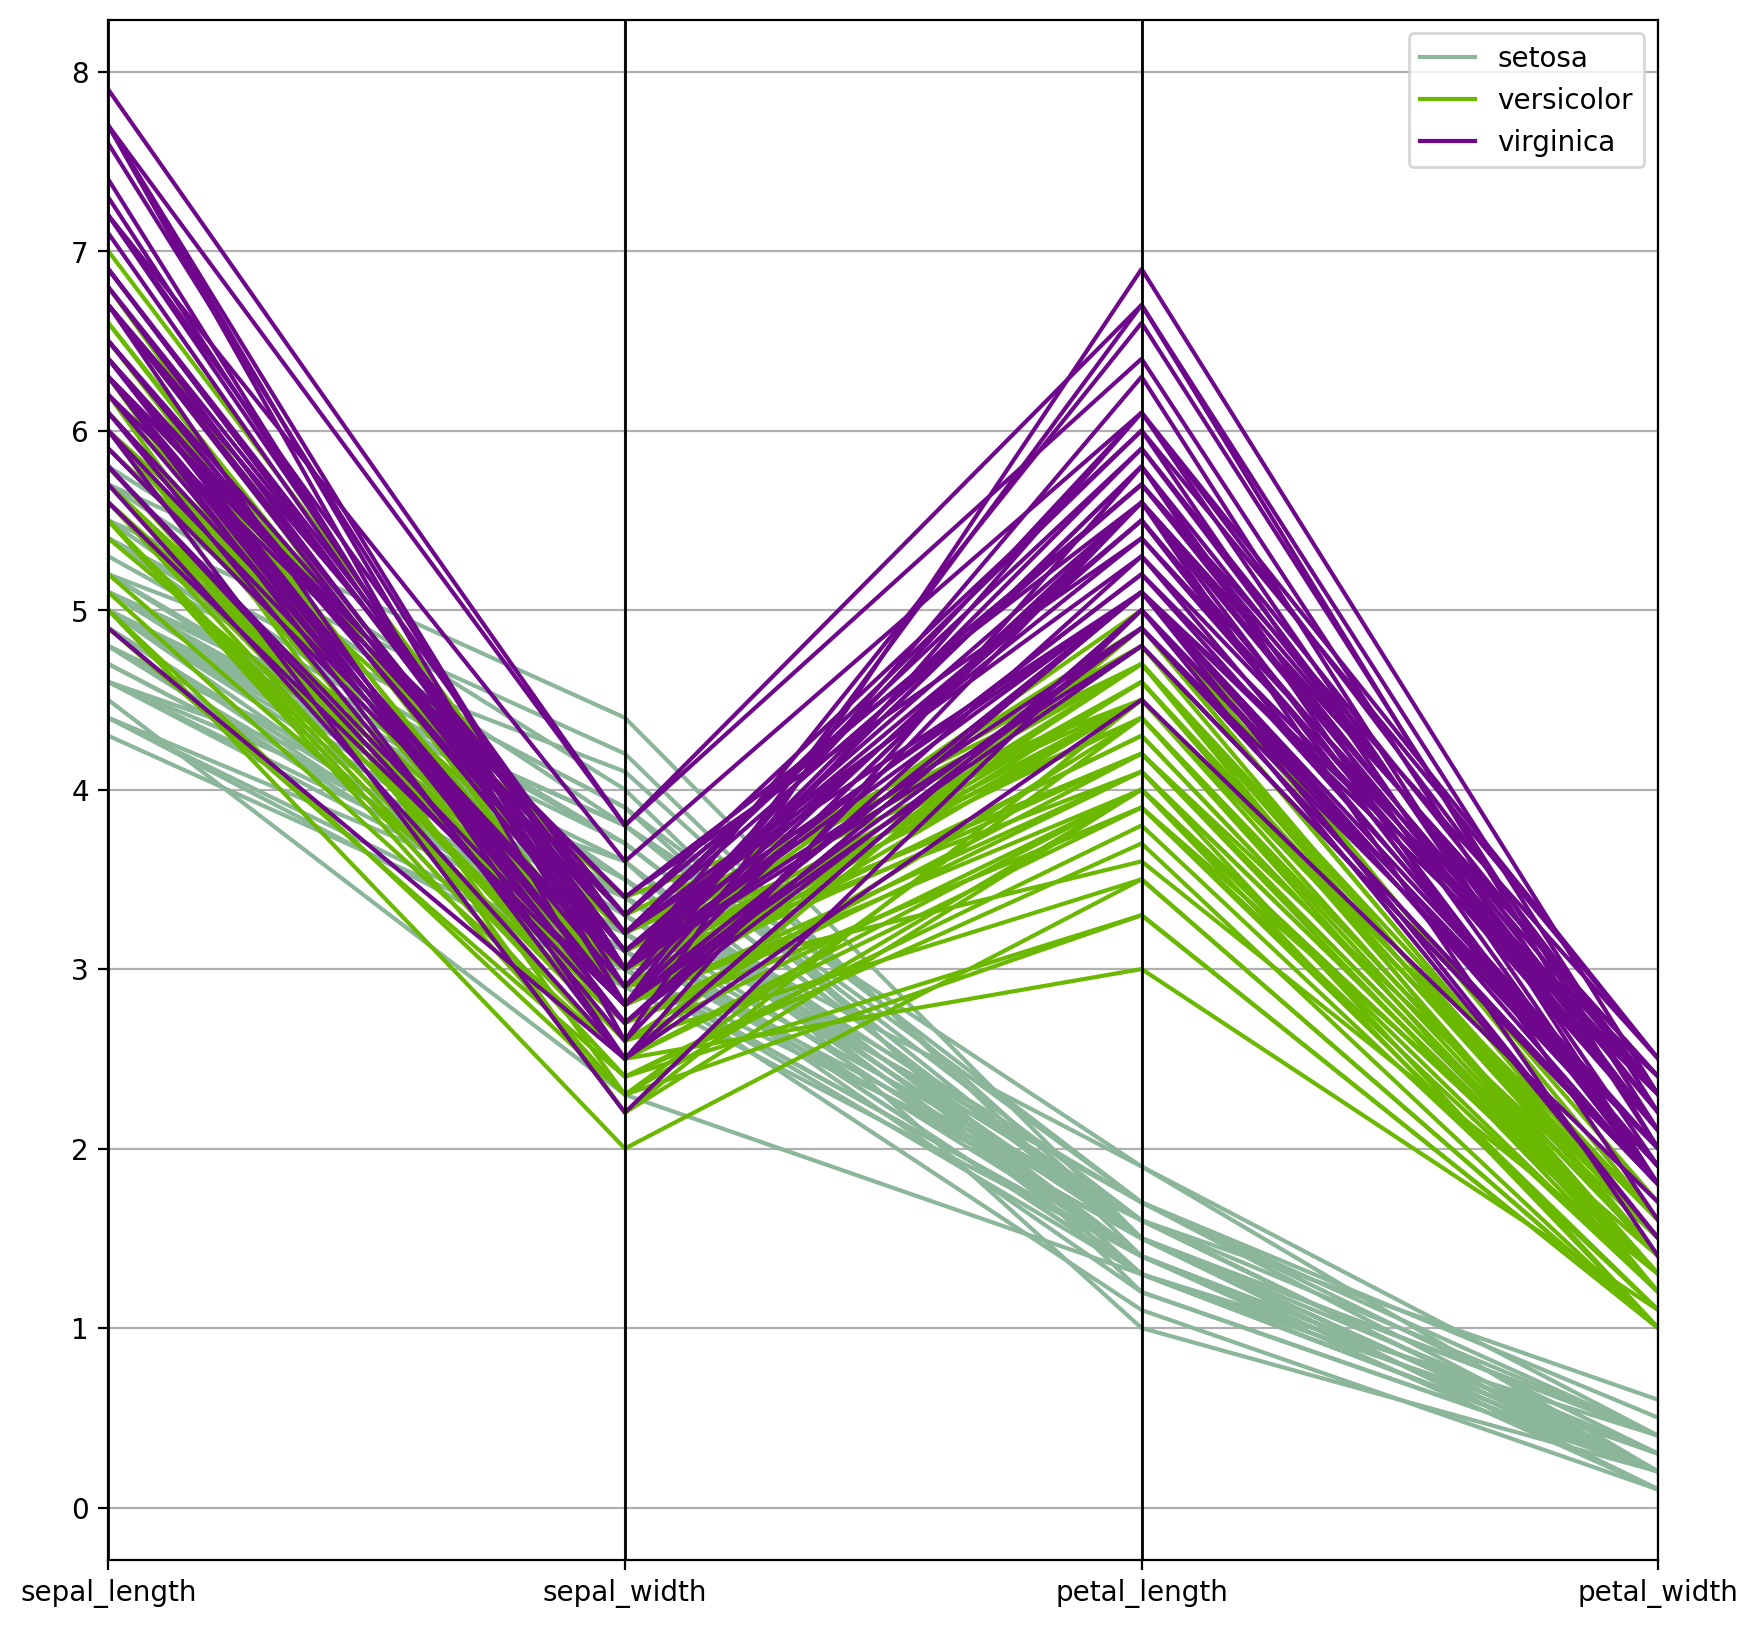

In [36]:
plt.figure(figsize=(10, 10))
parallel_coordinates(iris.reset_index(), 'species')
plt.show()

In [38]:
from pandas.plotting import radviz

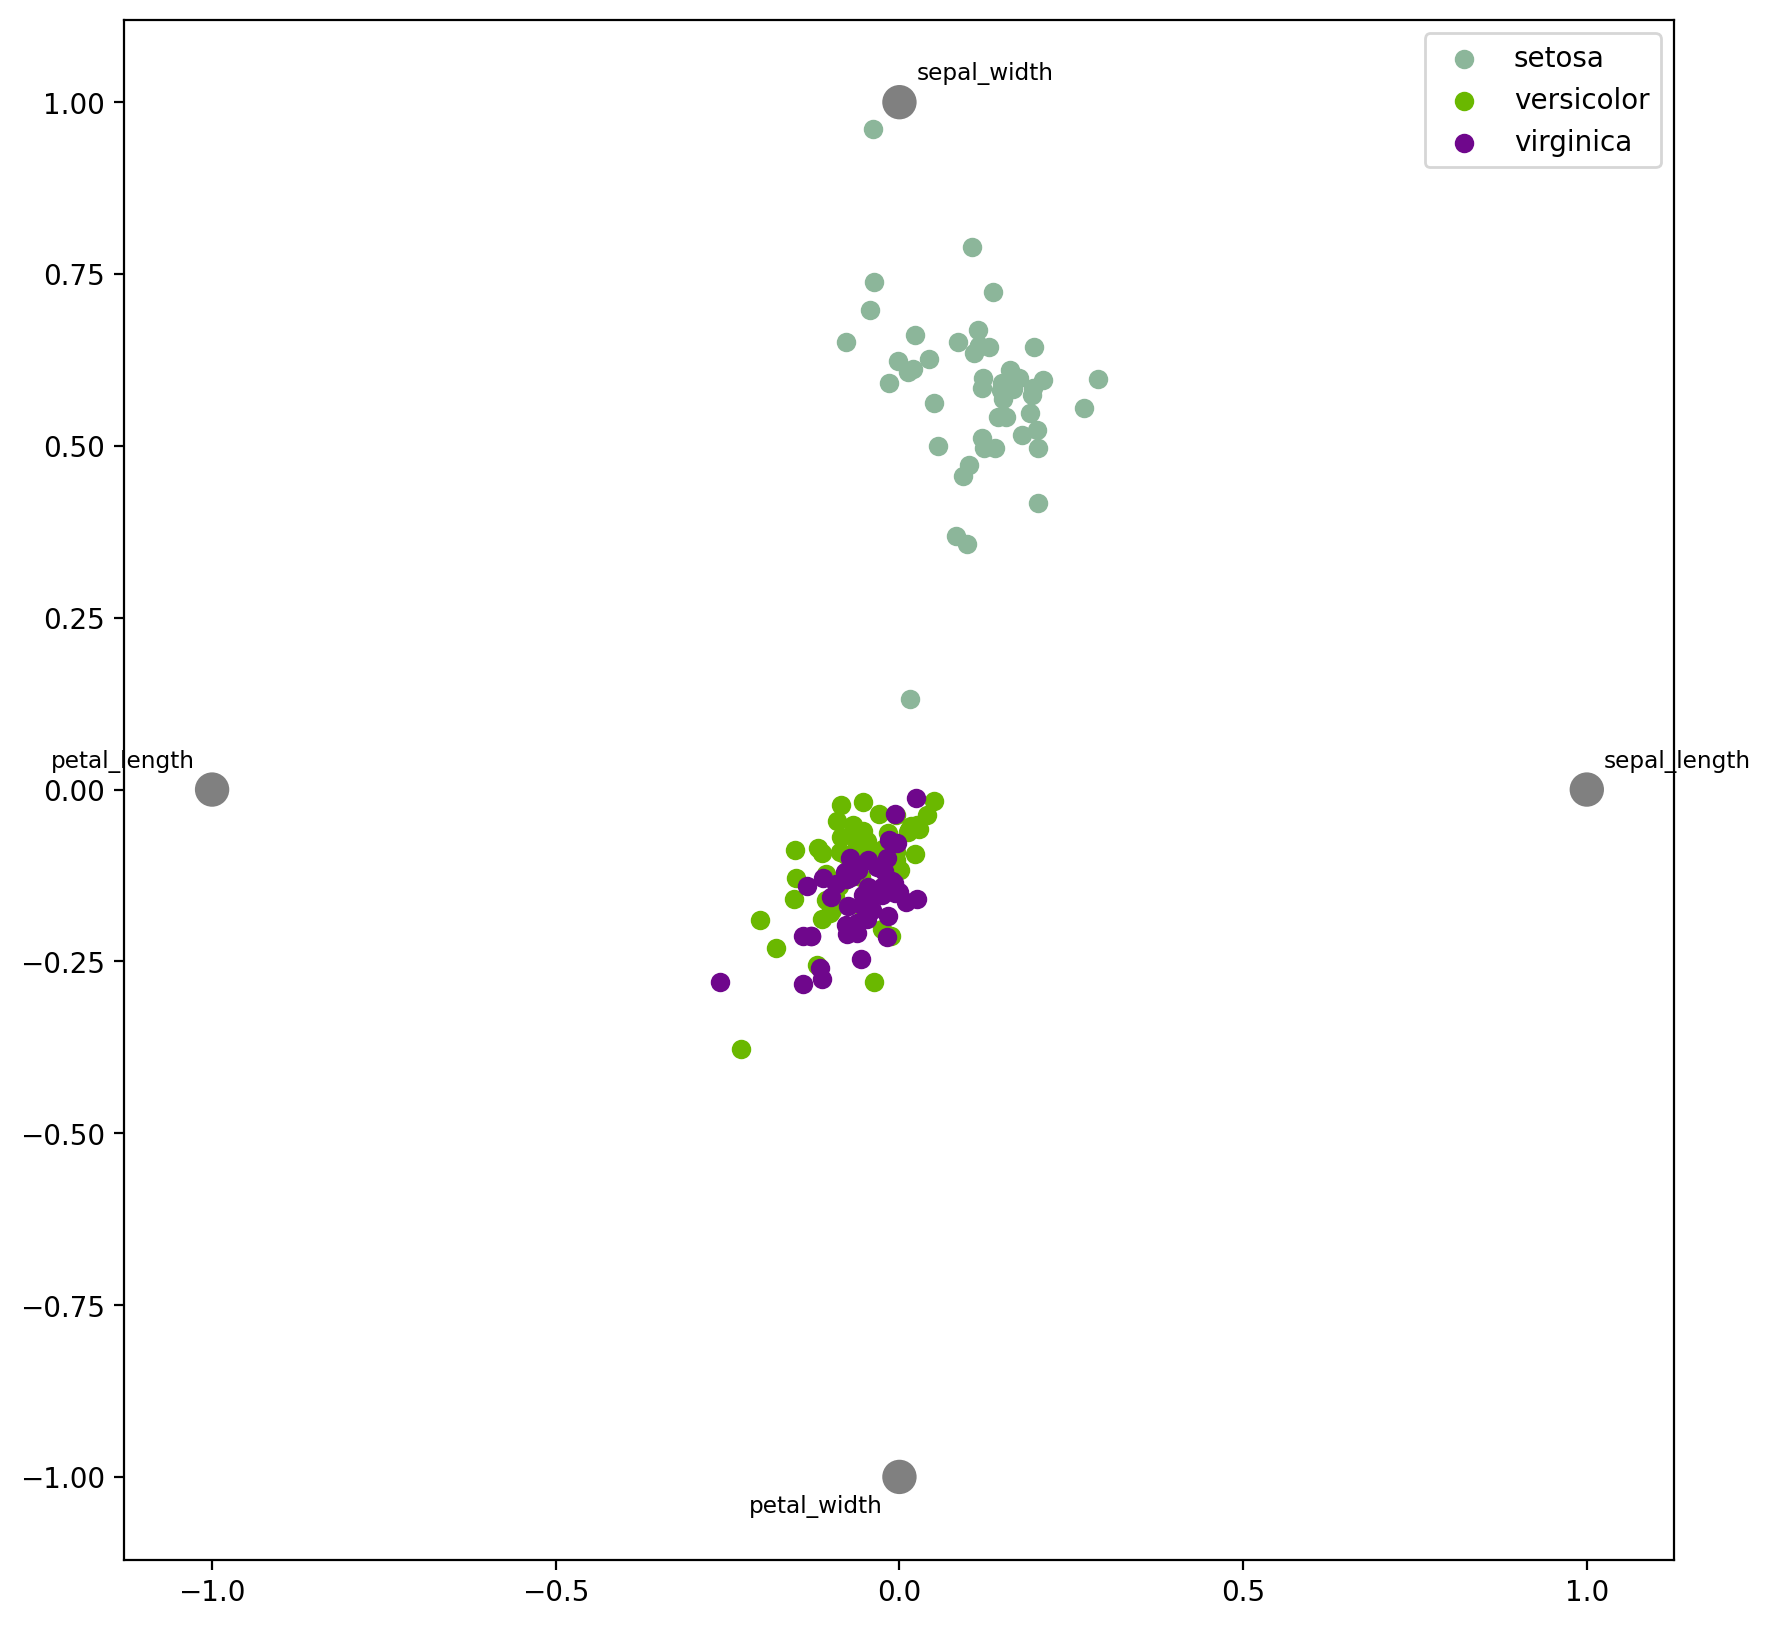

In [39]:
plt.figure(figsize=(10, 10))
radviz(iris.reset_index(), 'species')
plt.show()

### Visualização dos dados com Seaborn

In [61]:
iris['sepal_width'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
sns.set(color_codes=True) 

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Count'>

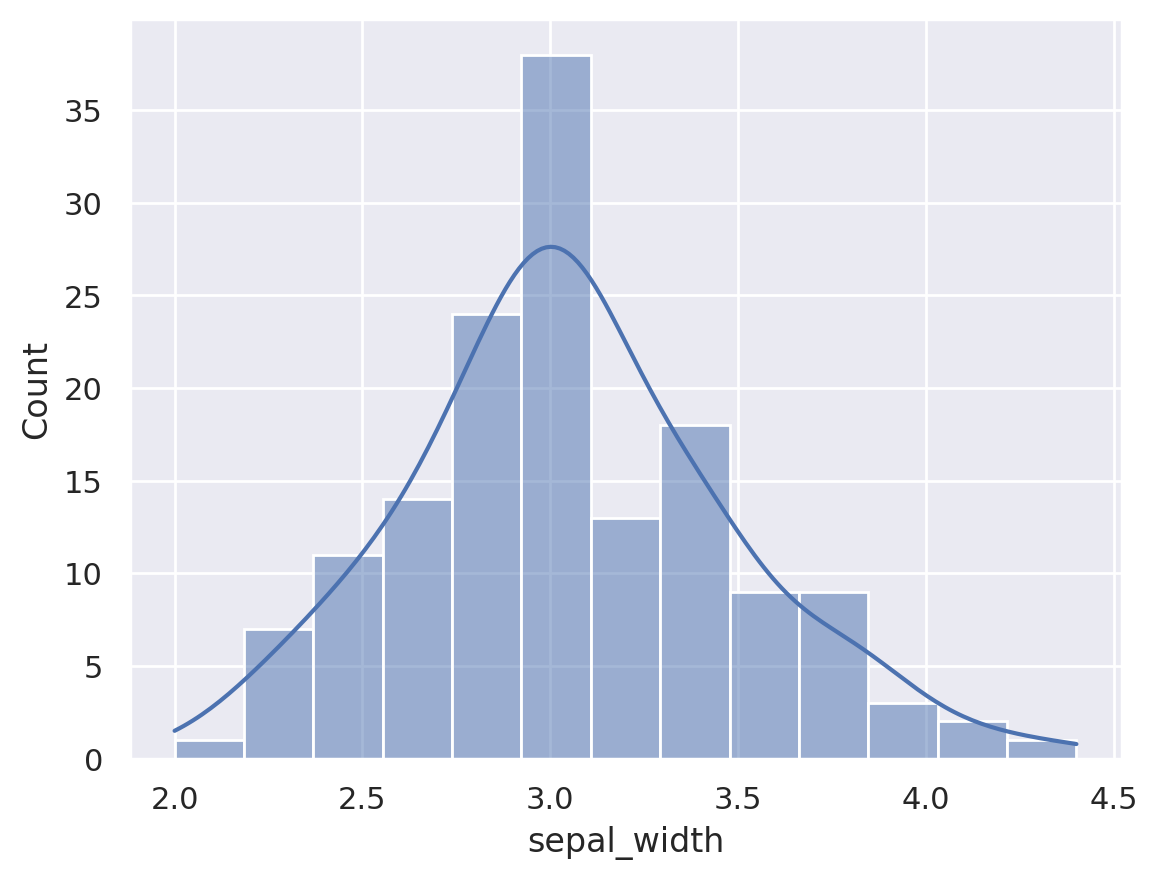

In [62]:
sns.histplot(iris['sepal_width'], kde=True)